# Project 02 - Image Processing

## Student Information

- Full name:
- Student ID:
- Class:

## Required Libraries

In [49]:
# IMPORT YOUR LIBS HERE
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Function Definitions

In [50]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    img = Image.open(img_path)
    img = np.array(img)
    return img


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img, cmap='gray')
    plt.axis('off')

def save_img(image, img_path, type_name):
    '''
    Save image to file

    Parameters
    ----------
    image : str
        Result image after finish algorithm
    img_path : str
        Path of image
    type_name : str
        Type of image
    '''
    # YOUR CODE HERE
    image.save(img_path.split('.')[0] + '_' + type_name + '.png','png', resolution=100.0)
    

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def adjust_brightness(image, brightness = 50):
    '''
    Adjust the brightness of the image

    Parameters
    ----------
    image : str
        Image
    brightness : int
        Brightness value

    Returns
    -------
    Image
        Brightness adjusted image
    '''
    img = np.array(image)
    height, width, _ = img.shape

    bright_image = np.zeros((height, width, _)) + brightness
    bright_image += img
    bright_image = np.where(bright_image < 255, bright_image, 255)
    bright_image = np.where(bright_image > 0, bright_image, 0)

    result = bright_image.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def adjust_contrast(image, contrast = 50):
    '''
    Adjust the contrast of the image

    Parameters
    ----------
    image : str
        Image
    contrast : int
        Contrast value

    Returns
    -------
    Image
        Contrast adjusted image
    '''
    img = np.array(image)
    contract_image = img*contrast

    contract_image = np.where(contract_image < 255, contract_image, 255)
    contract_image = np.where(contract_image > 0, contract_image, 0)

    result = contract_image.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def flip_horizontal(image):
    '''
    Flip the image horizontally

    Parameters
    ----------
    image : str
        Image

    Returns
    -------
    Image
        Horizontally flipped image
    '''
    img = np.array(image)
    img = img[:, ::-1, :]

    result = img.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def flip_vertical(image):
    '''
    Flip the image vertically

    Parameters
    ----------
    image: str
        Image

    Returns
    -------
    Image
        Vertically flipped image
    '''
    img = np.array(image)
    img = img[::-1, :, :]

    result = img.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def rgb_to_gray(image):
    '''
    Convert the image to grayscale

    Parameters
    ----------
    image : str
        Image

    Returns
    -------
    Image
        Grayscale image
    '''
    img = np.array(image)
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    gray = (R*0.3+G*0.59+B*0.11)
    gray = np.where(gray < 255, gray, 255)
    gray = np.where(gray > 0, gray, 0)

    result = gray.astype(np.uint8)
    rgb_image = np.dstack((result, result, result))
    result = Image.fromarray(rgb_image)
    return result

def rgb_to_sepia(image):
    '''
    Convert the image to sepia

    Parameters
    ----------
    image : str
        Image

    Returns
    -------
    Image
        Sepia image
    '''
    img = np.array(image)
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    img = np.dstack((R*0.393 + G*0.769 + B*0.189,
                    R*0.349 + G*0.686 + B*0.168,
                     R*0.272 + G*0.534 + B*0.131))
    img = np.where(img < 255, img, 255)
    img = np.where(img > 0, img, 0)
    result = img.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def blur_image(image):
    '''
    Blur the image

    Parameters
    ----------
    image: str
        Image

    Returns
    -------
    Image
        Blurred image
    '''
    img = np.array(image)
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
    img = np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='constant')
    height, width, _ = img.shape
    blur_image = np.zeros((height-2, width-2, _))
    for i in range(1, height-1):
        for j in range(1, width-1):
            blur_image[i-1, j-1] = np.sum(img[i-1:i+2, j-1:j+2]*kernel, axis=(0, 1))
    blur_image = np.where(blur_image < 255, blur_image, 255)
    blur_image = np.where(blur_image > 0, blur_image, 0)
    result = blur_image.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def blur_image(image, kernel_size):
    """
    Apply a blur effect to the image
    Parameters
    ----------
    image: str
        Image
    kernel_size : int
        Size of the blurring kernel
    Returns
    -------
    Image
        Blurred image
    """
    image = np.array(image)
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd integer.")

    # Get the dimensions of the image
    height, width, channels = image.shape

    # Create an averaging kernel
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

    # Pad the image to handle borders
    pad_size = kernel_size // 2
    padded_img = np.pad(
        image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')

    # Initialize the output image
    blur_image = np.zeros_like(image)

    # Apply the convolution for each channel
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                # Extract the region of interest
                region = padded_img[i:i + kernel_size, j:j + kernel_size, c]
                # Perform element-wise multiplication and sum the result
                blur_image[i, j, c] = np.sum(region * kernel)
    
    result = blur_image.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def sharpen_image(image, kernel_size):
    '''
    Apply a sharpen effect to the image
    
    Parameters
    ----------
    image_path : str
        Path to the image file
    kernel_size : int
        Size of the sharpening kernel
        
    Returns
    -------
    Image
        Sharpened image
    '''
    image = np.array(image)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image_array = np.zeros_like(image)
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(3):
                sharpened_image_array[i, j, k] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size, k] * kernel)
    sharpened_image_array = np.clip(sharpened_image_array, 0, 255)
    sharpened_image = Image.fromarray(sharpened_image_array.astype(np.uint8))
    return sharpened_image


def show_result(img,output_path, choice):
    if choice == 1 or choice == 0:
        # Adjust brightness
        brightness = int(input('Enter brightness value [-255:255]: '))
        result = adjust_brightness(img, brightness)
        show_img(result)
        if brightness < 0:
            save_img(result, output_path, 'decrese_brightness')
        else:
            save_img(result, output_path, 'increase_brightness')
    elif choice == 2 or choice == 0:
        # Adjust contrast
        contrast = int(input('Enter contrast value [-255:255]: '))
        result = adjust_contrast(img, contrast)
        show_img(result)
        save_img(output_path, 'contrast')
    elif choice == 3 or choice == 0:
        type = int(input('Enter type of flip (1: horizontal, 2: vertical): '))
        if type == 1:
            # 3.1 Flip horizontally
            result = flip_horizontal(img)
            show_img(result)
            save_img(result, output_path, 'flip_horizontal')
        elif type == 2:
            # 3.2 Flip vertically
            result = flip_vertical(img)
            show_img(result)
            save_img(result, output_path, 'flip_vertical')
        else:
            print('Invalid choice')
    elif choice == 4 or choice == 0:
        type = int(input('Enter type of convert (1: RGB to Gray, 2: RGB to Sepia): '))
        if type == 1:
            # 4.1 RGB to Gray
            result = rgb_to_gray(img)
            show_img(result)
            save_img(result, output_path, 'gray')
        elif type == 2:
            # 4.2 RGB to Sepia
            result = rgb_to_sepia(img)
            show_img(result)
            save_img(result, output_path, 'sepia')
        else:
            print('Invalid choice')
    elif choice == 5 or choice == 0:
        type = int(input('Enter type of convert (1: Blur image, 2: Sharpen image): '))
        if type == 1:
            # 5.1 Blur image
            kernel_size = int(input('Enter kernel_size: '))
            result = blur_image(img, kernel_size)
            show_img(result)
            save_img(result, output_path, 'blur')
        elif type == 2:
            # 5.2 Sharpen image
            kernel_size = int(input('Enter kernel_size: '))
            result = sharpen_image(img, kernel_size)
            show_img(result)
            save_img(result, output_path, 'sharpen')
            
        
        
#     elif choice == 6 or choice == 0:
#         # Center crop image
#     elif choice == 7 or choice == 0:
#         # 7.1 Circular crop
#         # 7.2 Elliptical crop
    
#     elif choice == 9 or choice == 0:
#         # Zoom in image
        
#         # Zoom out image
    else:
        print('Invalid choice')
    

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

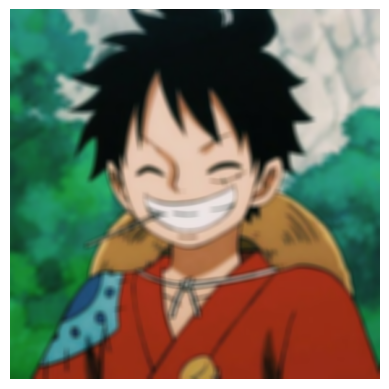

In [52]:
# YOUR CODE HERE
img_path = '/home/denver/Documents/MTH00057_Applied-Mathematics-and-Statistics/Test_case/luffy_wano.png'
img = read_img(img_path)
show_img(img)

# brightness = int(input('Enter brightness value: '))
# kernel_size = int(input('Enter kernel_size: '))
result = blur_image(img, kernel_size = 9)
#result = rgb_to_gray(img)
show_img(result)
save_img(result, img_path, 'blur')
# contrast = float(input('Enter contrast value: '))
# result = adjust_contrast(img, contrast)
# show_img(result)


## Main FUNCTION

In [7]:
# YOUR CODE HERE
def main():
    img_path = input('Enter the path of the image: ')

    # Read the image
    img = read_img(img_path)
    print('Original image:')
    show_img(img)

    # Convert the image to 1D
    print("0. Do it all. \n1. Adjust brightness. \n2. Adjust contrast \n3. Flip image (vertical or horizontal) \n4. Convert to grayscale \n5. Convert to sepia \n6. Sharpen images \n7. Blur image \n8. Crop at center \n9. Circular mask \n10. Elipse mask \n11. Exit")
    choice = int(input("Enter your choice: "))
    
    output_path = input('Enter the path to save the result:')
    show_result(img, output_path, choice)

In [8]:
# Call main function
if __name__ == '__main__':
    main()